In [111]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [112]:
# Step 2: Reading the dataset

df = pd.read_csv('data.csv')

In [113]:
df.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [114]:
# No null values, but there is an empy column which I will remove with the drop function

df.drop('Unnamed: 32',axis=1,inplace=True)

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [115]:
# Step 3: Dropping unnecessary columns

# Columns to drop:
# id value as the df index number will accomplish the same

# standard error columns as they are a statistic on the distribution not the values themselves

# mean columns as I am assuming the worst columns only show the most 'at risk' samples of each patient which 
# I would think would be more correlated to the outcome of the diagnosis than the mean of all samples from each patient


columns_to_drop = ['id','radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 
                   'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                   'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
                   'concavity_se','concave points_se','symmetry_se','fractal_dimension_se']

for column in columns_to_drop:
    df.drop(column,axis=1,inplace=True)

df.columns


Index(['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [116]:
# Step 4: Preprocessing

from sklearn.preprocessing import LabelEncoder, StandardScaler

# encodes the diagnosis value to 0=benign, 1=malignant
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])


# scales all columns except diagnosis column
scaler = StandardScaler()

for column in df:
    if column != 'diagnosis':
        df[column] = scaler.fit_transform(df[[column]])

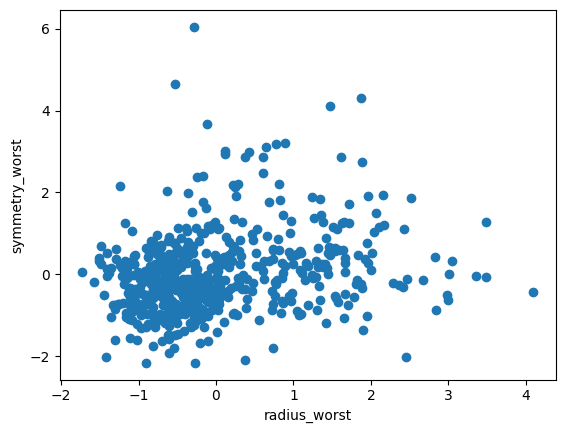

In [117]:
x = df['radius_worst']
y = df['symmetry_worst']

plt.xlabel(x.name)
plt.ylabel(y.name)

plt.scatter(x,y)

plt.show()

In [118]:
import seaborn as sns

In [119]:
# Step 5: Visualization

y = df['diagnosis']
X = df.loc[:,df.columns != 'diagnosis']


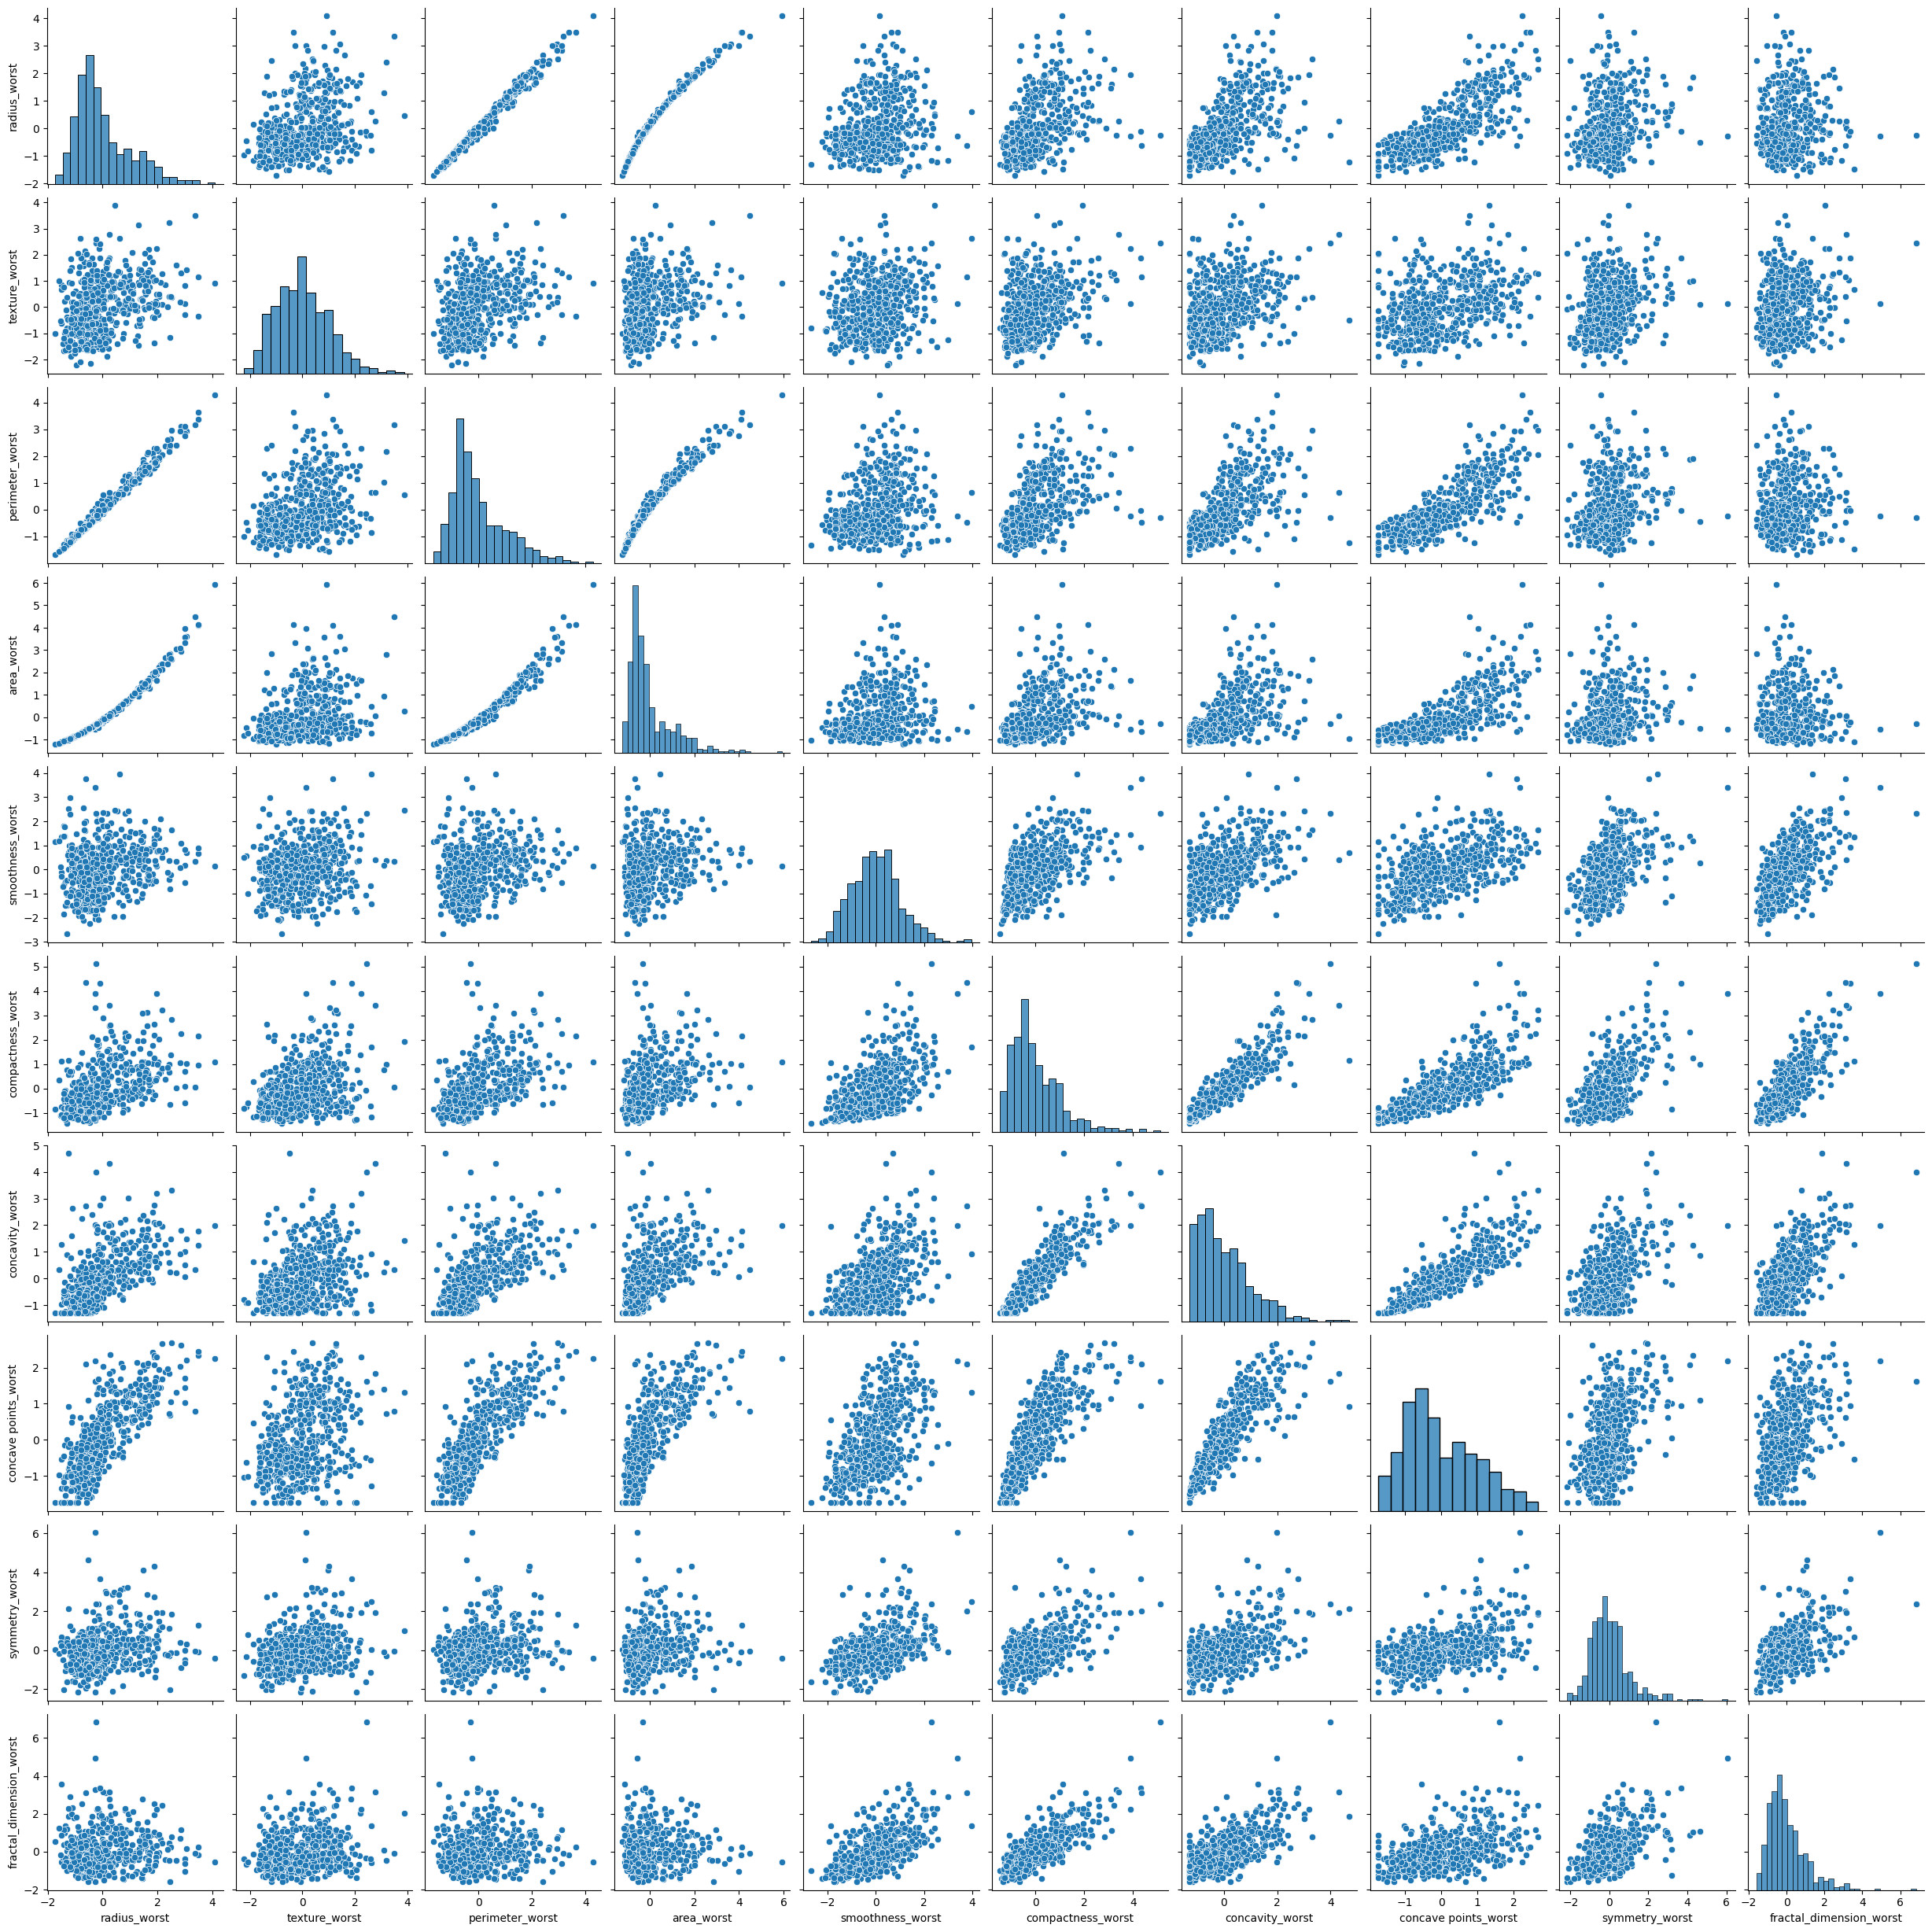

In [120]:
# pairplots
sns.pairplot(X)
plt.show()

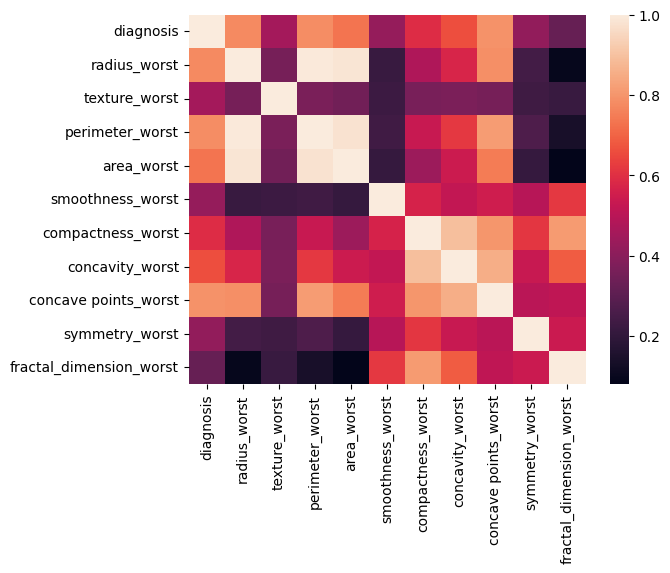

In [121]:
# correlation heatmap
corr = df.corr()

sns.heatmap(corr)
plt.show()

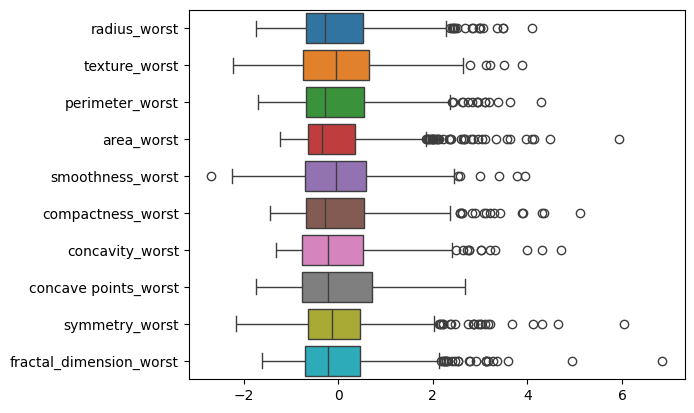

In [122]:
# boxplots
sns.boxplot(X,orient='h')
plt.show()

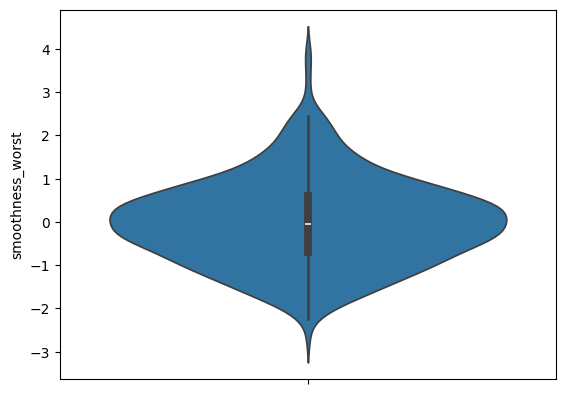

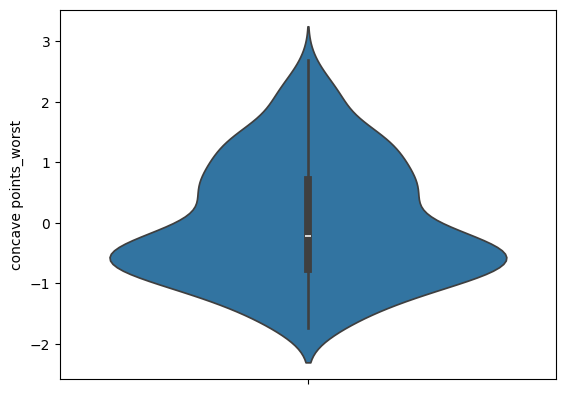

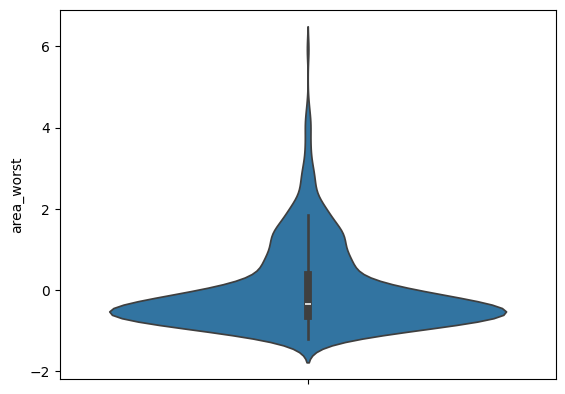

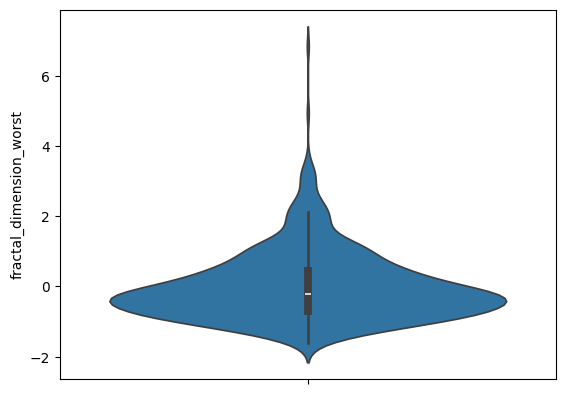

In [123]:
# Step 6
# violin plots
sns.violinplot(df['smoothness_worst'])
plt.show()

sns.violinplot(df['concave points_worst'])
plt.show()

sns.violinplot(df['area_worst'])
plt.show()

sns.violinplot(df['fractal_dimension_worst'])
plt.show()


The violin plots above show the distributions of values for 4 different columns from the dataset. The first two plots show the columns 'smoothness_worst' and 'concave points_worst'. These columns both have fairly tight distibutions with not many outliers, as a result, the plots look rather plump and do not have very long tails on the top or bottom. On the other hand, the last two plots show the columns 'area_worst' and 'fractal_dimension_worst' which both exibit less tight distubutions with more extreme outliers. As a reult the plots show a more extreme bump near the median of the distubution and much longer tails on the high-end.